In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
train_df = pd.read_csv('train.csv') # loading dataseet
test_df = pd.read_csv('submission.csv')
train_df

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,US,"Arts, Entertainment, and Recreation",Supervisors of Transportation and Material Mov...,32350.0,40200.0,50790.0,62560.0,78520.0
1,US,"Mining, Quarrying, and Oil and Gas Extraction","Sales Representatives, Wholesale and Manufactu...",47860.0,61600.0,87810.0,107460.0,153600.0
2,US,Finance and Insurance,Physical Scientists,59240.0,63050.0,89740.0,126320.0,149070.0
3,US,Administrative and Support and Waste Managemen...,"Architects, Surveyors, and Cartographers",37320.0,47630.0,60550.0,77450.0,98990.0
4,US,Manufacturing,Supervisors of Protective Service Workers,50130.0,63840.0,81770.0,104530.0,133180.0
...,...,...,...,...,...,...,...,...
2292,NJ,Cross-industry,Legal Occupations,47950.0,73720.0,101550.0,163990.0,NaN
2293,NY,Cross-industry,Legal Occupations,47580.0,75920.0,126220.0,NaN,NaN
2294,RI,Cross-industry,Legal Occupations,46400.0,60560.0,98070.0,161120.0,NaN
2295,TX,Cross-industry,Legal Occupations,37540.0,51260.0,80850.0,135490.0,NaN


In [ ]:
train_df.columns # columns in the dataset

Index(['PRIM_STATE', 'NAICS_TITLE', 'OCC_TITLE', 'A_PCT10', 'A_PCT25',
       'A_MEDIAN', 'A_PCT75', 'A_PCT90'],
      dtype='object')

In [ ]:
#total number of null values in a column
for col in train_df.columns:
  print(train_df[col].isna().sum())

0
0
0
0
0
0
30
139


In [ ]:
#create a copy to not lose orginality of the orginal dataset
train_df_copy = train_df.copy()

In [ ]:
#Dealing with the null values
#Approach 1 for the null values
average_A_PCT75 = train_df['A_PCT75'].sum(skipna = True)/(len(train_df['A_PCT75'].values)-train_df['A_PCT75'].isna().sum())
average_A_PCT90 = train_df['A_PCT90'].sum(skipna = True)/(len(train_df['A_PCT90'].values)-train_df['A_PCT90'].isna().sum())
train_df_copy['A_PCT75'].fillna(average_A_PCT75, inplace =  True)
train_df_copy['A_PCT90'].fillna(average_A_PCT90, inplace =  True)

In [ ]:
for col in train_df_copy.columns:
  print(train_df_copy[col].isna().sum())

0
0
0
0
0
0
0
0


In [ ]:
# check weather the percentiles replaced are in increasing fashion
flag = 0
PCT50 = train_df_copy['A_MEDIAN'].values
PCT75 = train_df_copy['A_PCT75'].values
PCT90 = train_df_copy['A_PCT90'].values
for i in range(len(PCT50)):
  if(PCT50[i] > PCT75[i] or PCT75[i] > PCT90[i]):
    flag = flag +1
print(flag)
#that means after replacing the null values with averages disrupted the increasing trend of percentiles

139


In [ ]:
train_df_copy.values[2158:2159, 5:] # an example of non-increasing percentile set after replacement

array([[102450.0, 160960.0, 87937.31232622798]], dtype=object)

In [ ]:
#so, it's better to delete the complete row having at least one null value
train_df_copy = train_df.copy()
train_df_copy.dropna(inplace = True)

In [ ]:
for col in train_df.columns:
  print(train_df_copy[col].isna().sum())
#null values are now gone!

0
0
0
0
0
0
0
0


In [ ]:
train_df_copy.shape

(2158, 8)

In [ ]:
train_df_copy.describe
# nothing much can be concluded as of now!

<bound method NDFrame.describe of      PRIM_STATE                                        NAICS_TITLE  \
0            US                Arts, Entertainment, and Recreation   
1            US      Mining, Quarrying, and Oil and Gas Extraction   
2            US                              Finance and Insurance   
3            US  Administrative and Support and Waste Managemen...   
4            US                                      Manufacturing   
...         ...                                                ...   
2153         US  Federal, State, and Local Government, excludin...   
2154         US                               Educational Services   
2155         US                               Educational Services   
2156         US                  Health Care and Social Assistance   
2157         US   Professional, Scientific, and Technical Services   

                                              OCC_TITLE  A_PCT10  A_PCT25  \
0     Supervisors of Transportation and Material

In [ ]:
train_df_copy['NAICS_TITLE'].unique()

array(['Arts, Entertainment, and Recreation',
       'Mining, Quarrying, and Oil and Gas Extraction',
       'Finance and Insurance',
       'Administrative and Support and Waste Management and Remediation Services',
       'Manufacturing', 'Other Services (except Public Administration)',
       'Health Care and Social Assistance', 'Cross-industry',
       'Retail Trade', 'Professional, Scientific, and Technical Services',
       'Information', 'Real Estate and Rental and Leasing',
       'Wholesale Trade', 'Management of Companies and Enterprises',
       'Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)',
       'Educational Services', 'Utilities',
       'Agriculture, Forestry, Fishing and Hunting', 'Construction',
       'Transportation and Warehousing',
       'Accommodation and Food Services'], dtype=object)

In [ ]:
train_df_copy['OCC_TITLE'].unique()

array(['Supervisors of Transportation and Material Moving Workers',
       'Sales Representatives, Wholesale and Manufacturing',
       'Physical Scientists', 'Architects, Surveyors, and Cartographers',
       'Supervisors of Protective Service Workers',
       'Supervisors of Construction and Extraction Workers',
       'Life Scientists', 'Community and Social Service Occupations',
       'Extraction Workers',
       'Entertainment Attendants and Related Workers',
       'Counselors, Social Workers, and Other Community and Social Service Specialists',
       'Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides',
       'Office and Administrative Support Occupations',
       'Computer and Mathematical Occupations',
       'Other Installation, Maintenance, and Repair Occupations',
       'Food Preparation and Serving Related Occupations',
       'Printing Workers', 'Architecture and Engineering Occupations',
       'Art and Design Workers', 'Per

In [ ]:
train_df_copy['PRIM_STATE'].unique()

array(['US', 'RI', 'NJ', 'NH', 'DE', 'WA', 'MI', 'ID', 'VA', 'NY', 'AR',
       'AZ', 'TX', 'IL', 'MO', 'OH', 'UT', 'OK', 'WV', 'PA', 'IN', 'HI',
       'KY', 'LA', 'MS', 'MN', 'NC', 'TN', 'ME', 'FL', 'NM', 'KS', 'CO',
       'DC', 'MD', 'VT', 'MA', 'OR', 'CA', 'IA', 'AL', 'WI', 'CT', 'NV',
       'SC', 'GA', 'AK', 'WY', 'NE', 'SD', 'MT', 'ND'], dtype=object)

In [ ]:
# check if test dataset contains any different categorical value altogether in a column
for i in test_df['PRIM_STATE'].unique():
  if i not in train_df['PRIM_STATE'].unique():
    print(1)
for i in test_df['NAICS_TITLE'].unique():
  if i not in train_df['NAICS_TITLE'].unique():
    print(1)
for i in test_df['OCC_TITLE'].unique():
  if i not in train_df['OCC_TITLE'].unique():
    print(1)

In [ ]:
#let's define the normalised mean weighted absolute error
def mnwe(y_test, y_pred):
  errors = []
  w1 = 0.1
  w2 = 0.2
  w3 = 0.4
  w4 = 0.2
  w5 = 0.1
  for i in range(y_test.shape[0]):
    error = (w1*abs(y_test[i][0]-y_pred[i][0])/y_test[i][0]) + (w2*abs(y_test[i][1]-y_pred[i][1])/y_test[i][1]) + (w3*abs(y_test[i][2]-y_pred[i][2])/y_test[i][2]) + (w4*abs(y_test[i][3]-y_pred[i][3])/y_test[i][3]) + (w5*abs(y_test[i][4]-y_pred[i][4])/y_test[i][4])
    errors.append(error)
  return errors

In [ ]:
#check for the categorical valuewith highest occurence
train_df_copy['PRIM_STATE'].value_counts()

US    1390
FL      19
WV      19
SD      18
NM      18
WA      18
MI      18
ME      18
MO      17
DC      17
MN      17
KY      17
UT      17
NC      17
NH      17
AR      17
ND      17
MT      16
GA      16
LA      16
AZ      16
AL      16
CO      16
ID      16
DE      16
OH      15
MA      15
HI      15
NV      15
MS      15
CA      15
MD      14
IA      14
WI      14
IL      14
TX      14
IN      14
TN      14
KS      13
WY      13
SC      13
VT      13
NY      13
OK      13
RI      12
VA      12
AK      12
NE      12
NJ      12
PA      12
CT      11
OR      10
Name: PRIM_STATE, dtype: int64

In [ ]:
train_df_copy['NAICS_TITLE'].value_counts()

Cross-industry                                                                                                                         847
Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)     85
Other Services (except Public Administration)                                                                                           81
Health Care and Social Assistance                                                                                                       79
Administrative and Support and Waste Management and Remediation Services                                                                76
Educational Services                                                                                                                    76
Management of Companies and Enterprises                                                                                                 75
Arts, Entertainment, and Re

In [ ]:
train_df['OCC_TITLE'].value_counts()

Legal Occupations                                                           57
Management Occupations                                                      57
Sales and Related Occupations                                               56
Life, Physical, and Social Science Occupations                              56
Office and Administrative Support Occupations                               55
                                                                            ..
Rail Transportation Workers                                                  7
Preschool, Elementary, Middle, Secondary, and Special Education Teachers     6
Postsecondary Teachers                                                       6
Funeral Service Workers                                                      5
Law Enforcement Workers                                                      3
Name: OCC_TITLE, Length: 116, dtype: int64

In [ ]:
#order of categorical values in 'PRIM_STATE' as per the mean
avg = []
for i in train_df['PRIM_STATE'].unique():
  sum = 0
  for j in train_df[train_df['PRIM_STATE'] == i]['A_PCT10']:
    sum = sum + j
  sum = sum/len(train_df[train_df['PRIM_STATE'] == i])
  avg.append(sum)
avg = np.array(avg)
df_visual1 = pd.DataFrame({'PRIM_STATE': train_df['PRIM_STATE'].unique(), 'average_PCT10': avg})
df_visual1.sort_values(by = ['average_PCT10'], ascending = False)

,PRIM_STATE,average_PCT10
33,DC,43837.368421
5,WA,40251.578947
36,MA,39418.823529
38,CA,38533.529412
42,CT,38418.461538
34,MD,37784.000000
1,RI,37317.857143
9,NY,36720.000000
46,AK,36665.833333
2,NJ,36571.333333


In [ ]:
#order of categorical values in 'NAICS_TITLE' as per the mean
avg = []
for i in train_df['NAICS_TITLE'].unique():
  sum = 0
  for j in train_df[train_df['NAICS_TITLE'] == i]['A_PCT10']:
    sum = sum + j
  sum = sum/len(train_df[train_df['NAICS_TITLE'] == i])
  avg.append(sum)
avg = np.array(avg)
df_visual1 = pd.DataFrame({'NAICS_TITLE': train_df['NAICS_TITLE'].unique(), 'average_PCT10': avg})
df_visual1.sort_values(by=['average_PCT10'], ascending = False)

,NAICS_TITLE,average_PCT10
16,Utilities,54602.549020
1,"Mining, Quarrying, and Oil and Gas Extraction",43858.979592
2,Finance and Insurance,43735.211268
13,Management of Companies and Enterprises,40968.214286
10,Information,39316.714286
4,Manufacturing,37816.582278
19,Transportation and Warehousing,36514.705882
14,"Federal, State, and Local Government, excludin...",35737.441860
9,"Professional, Scientific, and Technical Services",35583.684211
12,Wholesale Trade,35311.408451


In [ ]:
#order of categorical values in 'OCC_TITLE' as per the mean
avg = []
for i in train_df['OCC_TITLE'].unique():
  sum = 0
  for j in train_df[train_df['OCC_TITLE'] == i]['A_PCT10']:
    sum = sum + j
  sum = sum/len(train_df[train_df['OCC_TITLE'] == i])
  avg.append(sum)
avg = np.array(avg)
df_visual1 = pd.DataFrame({'OCC_TITLE': train_df['OCC_TITLE'].unique(), 'average_PCT10': avg})
df_visual1.sort_values(by = ['average_PCT10'], ascending = False)

,OCC_TITLE,average_PCT10
115,"Lawyers, Judges, and Related Workers",73601.578947
90,"Advertising, Marketing, Promotions, Public Rel...",68926.111111
76,Operations Specialties Managers,67756.111111
38,Other Management Occupations,62638.461538
36,Engineers,59095.333333
...,...,...
15,Food Preparation and Serving Related Occupations,21539.230769
40,Retail Sales Workers,21528.000000
39,Other Food Preparation and Serving Related Wor...,21467.500000
46,Food and Beverage Serving Workers,19890.000000


In [ ]:
train_df_copy.sort_values(by = ['A_PCT10'], ascending = False)

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
736,US,Utilities,Other Management Occupations,93060.0,108610.0,131620.0,164060.0,205800.0
32,US,Finance and Insurance,Animal Care and Service Workers,83560.0,84260.0,85950.0,93010.0,93140.0
733,US,Utilities,Firefighting and Prevention Workers,80510.0,101230.0,123000.0,125640.0,133350.0
1896,US,Utilities,Educational Instruction and Library Occupations,80280.0,103620.0,120730.0,152100.0,157700.0
956,US,Finance and Insurance,"Architects, Surveyors, and Cartographers",80180.0,125880.0,160800.0,162980.0,181100.0
...,...,...,...,...,...,...,...,...
1927,US,"Mining, Quarrying, and Oil and Gas Extraction",Protective Service Occupations,17290.0,17290.0,24330.0,39200.0,50170.0
684,AL,Cross-industry,Food Preparation and Serving Related Occupations,17290.0,17920.0,20690.0,26020.0,31180.0
769,LA,Cross-industry,Healthcare Support Occupations,17280.0,18210.0,23370.0,29470.0,37100.0
295,LA,Cross-industry,Food Preparation and Serving Related Occupations,17120.0,17860.0,19810.0,24400.0,30460.0


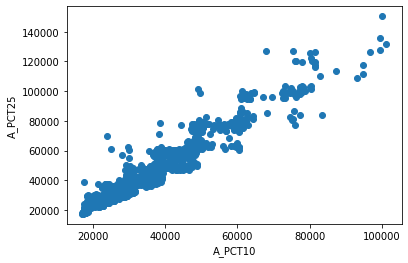

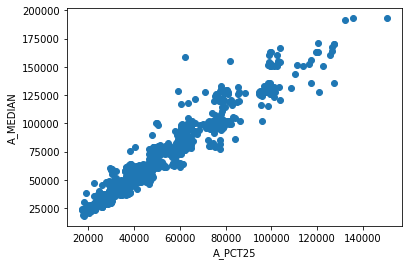

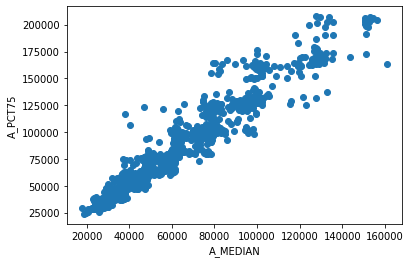

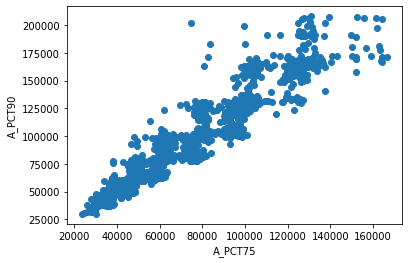

In [ ]:
#relationship between the percentiles
plt.scatter(train_df['A_PCT10'], train_df['A_PCT25'])
plt.xlabel('A_PCT10')
plt.ylabel('A_PCT25')
plt.show()
plt.scatter(train_df['A_PCT25'], train_df['A_MEDIAN'])
plt.xlabel('A_PCT25')
plt.ylabel('A_MEDIAN')
plt.show()
plt.scatter(train_df['A_MEDIAN'], train_df['A_PCT75'])
plt.xlabel('A_MEDIAN')
plt.ylabel('A_PCT75')
plt.show()
plt.scatter(train_df['A_PCT75'], train_df['A_PCT90'])
plt.xlabel('A_PCT75')
plt.ylabel('A_PCT90')
plt.show()
#WE CAN NOTICE A SOMEWHAT LINEAR INCREASING TREND BETWEEN ADJACENT PERCENTILES

In [ ]:
# As, prime state'US' and naics title 'Cross-industry' have high occurences, 
# we can check for increasing trend in occ_title which keeping prime state and naics_title constant
sam_v = train_df_copy[train_df_copy['PRIM_STATE']=='US']
sam_v = sam_v[sam_v['NAICS_TITLE']=='Cross-industry']
sam_v[['OCC_TITLE', 'A_PCT10']].sort_values(by=['A_PCT10'], ascending = False)

,OCC_TITLE,A_PCT10
1495,Engineers,61000.0
945,Healthcare Diagnosing or Treating Practitioners,59640.0
1025,Mathematical Science Occupations,49490.0
366,Physical Scientists,48410.0
394,Rail Transportation Workers,48120.0
...,...,...
1482,Other Personal Care and Service Workers,20650.0
1078,Personal Care and Service Occupations,19810.0
1372,Cooks and Food Preparation Workers,19760.0
102,Other Food Preparation and Serving Related Wor...,18510.0


In [ ]:
#challenge is to order the categorical values of the first three columns
#for that we need to look for which categorical vavlue has high potential as compared to 
#others in the same column

In [ ]:
# First approach is to generate a function based on the mean, variance and max/min value 
#for each category in a column and ordering based on the value obtained from the formula

#variable = 'PRIM_STATE'
#1.MEAN FOR EACH UNIQUE CATEGGORY IN THE COLUMN
mean_var1 = []
for i in train_df_copy['PRIM_STATE'].unique():
  mean_pr = train_df_copy[train_df_copy['PRIM_STATE']==i]['A_PCT10']
  temp = 0
  for j in mean_pr:
    temp = temp+j
  temp = temp/len(mean_pr)
  mean_var1.append(temp)
mean_prim_state = pd.DataFrame({'PRIM_STATE': train_df_copy['PRIM_STATE'].unique(), 'mean':mean_var1})
mean_prim_state.sort_values(by = 'mean', ascending = False)

,PRIM_STATE,mean
33,DC,39770.588235
5,WA,38423.888889
36,MA,37272.000000
46,AK,36665.833333
38,CA,36563.333333
37,OR,36369.000000
34,MD,36284.285714
42,CT,35557.272727
21,HI,34862.000000
28,ME,34535.000000


In [ ]:
#variable = 'PRIM_STATE'
#2.Variance FOR EACH UNIQUE CATEGGORY IN THE COLUMN
sd_var1 = []
for i in train_df_copy['PRIM_STATE'].unique():
  sd_pr = train_df_copy[train_df_copy['PRIM_STATE']==i]['A_PCT10']
  temp = 0
  mean = mean_prim_state[mean_prim_state['PRIM_STATE']==i]['mean'].values
  for j in sd_pr:
    temp = temp+(abs(mean[0]-j)**2)
  temp = temp/len(sd_pr)
  temp = temp**(1/2)
  sd_var1.append(temp)
sd_prim_state = pd.DataFrame({'PRIM_STATE': train_df_copy['PRIM_STATE'].unique(), 'sd':sd_var1})
sd_prim_state.sort_values(by = 'sd', ascending = False)

,PRIM_STATE,sd
34,MD,11700.981469
0,US,11186.813948
4,DE,10772.454166
1,RI,10720.921492
42,CT,10685.859893
36,MA,10434.663515
2,NJ,10286.339917
40,AL,10231.387808
21,HI,10075.321798
5,WA,10030.335177


In [ ]:
#variable = 'PRIM_STATE'
#3.MAX A_PCT10 FOR EACH UNIQUE CATEGGORY IN THE COLUMN
max_var1 = []
for i in train_df_copy['PRIM_STATE'].unique():
  max_pr = train_df_copy[train_df_copy['PRIM_STATE']==i]['A_PCT10']
  max_var1.append(min(max_pr))
max_prim_state = pd.DataFrame({'PRIM_STATE': train_df_copy['PRIM_STATE'].unique(), 'max':max_var1})
max_prim_state.sort_values(by = 'max', ascending = False)

,PRIM_STATE,max
33,DC,31200.0
37,OR,29250.0
36,MA,29230.0
38,CA,29120.0
5,WA,28850.0
9,NY,27650.0
28,ME,27390.0
32,CO,26490.0
11,AZ,26400.0
42,CT,25920.0


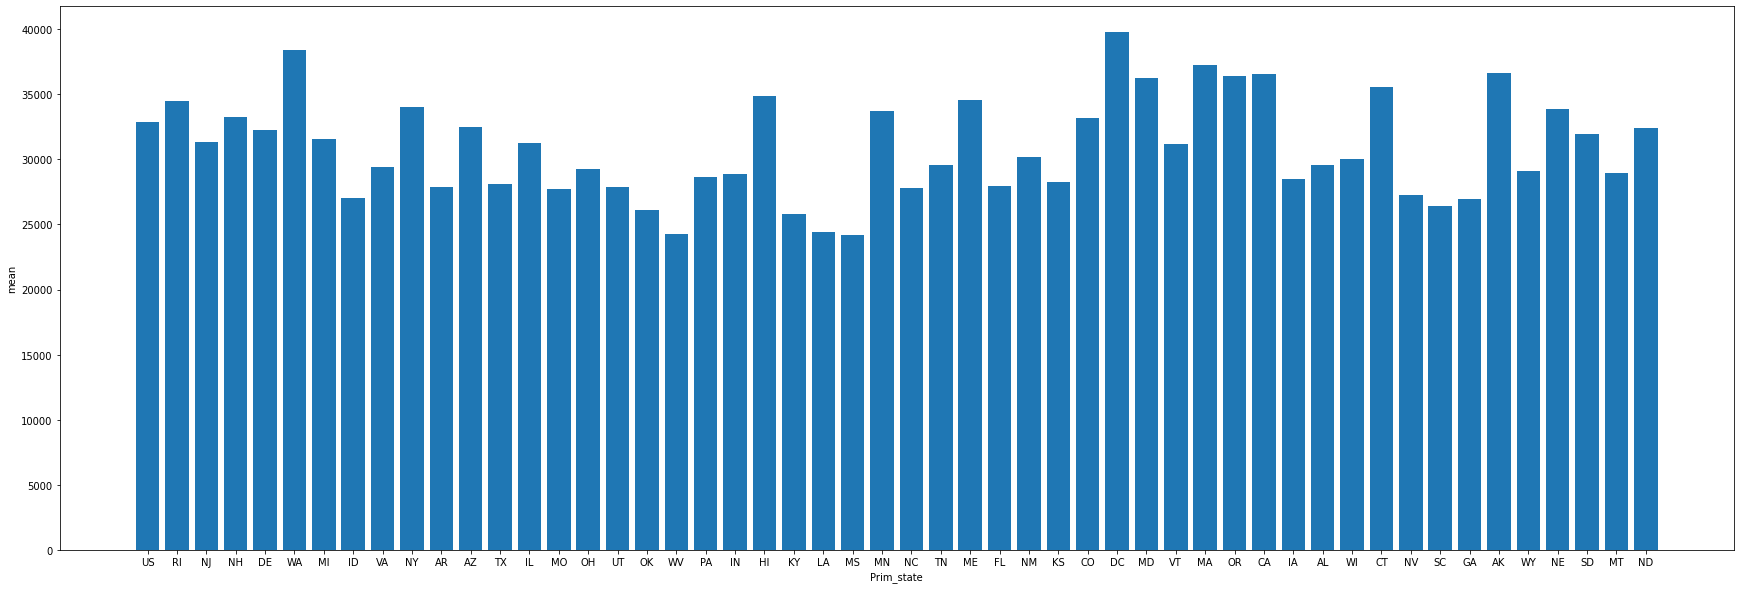

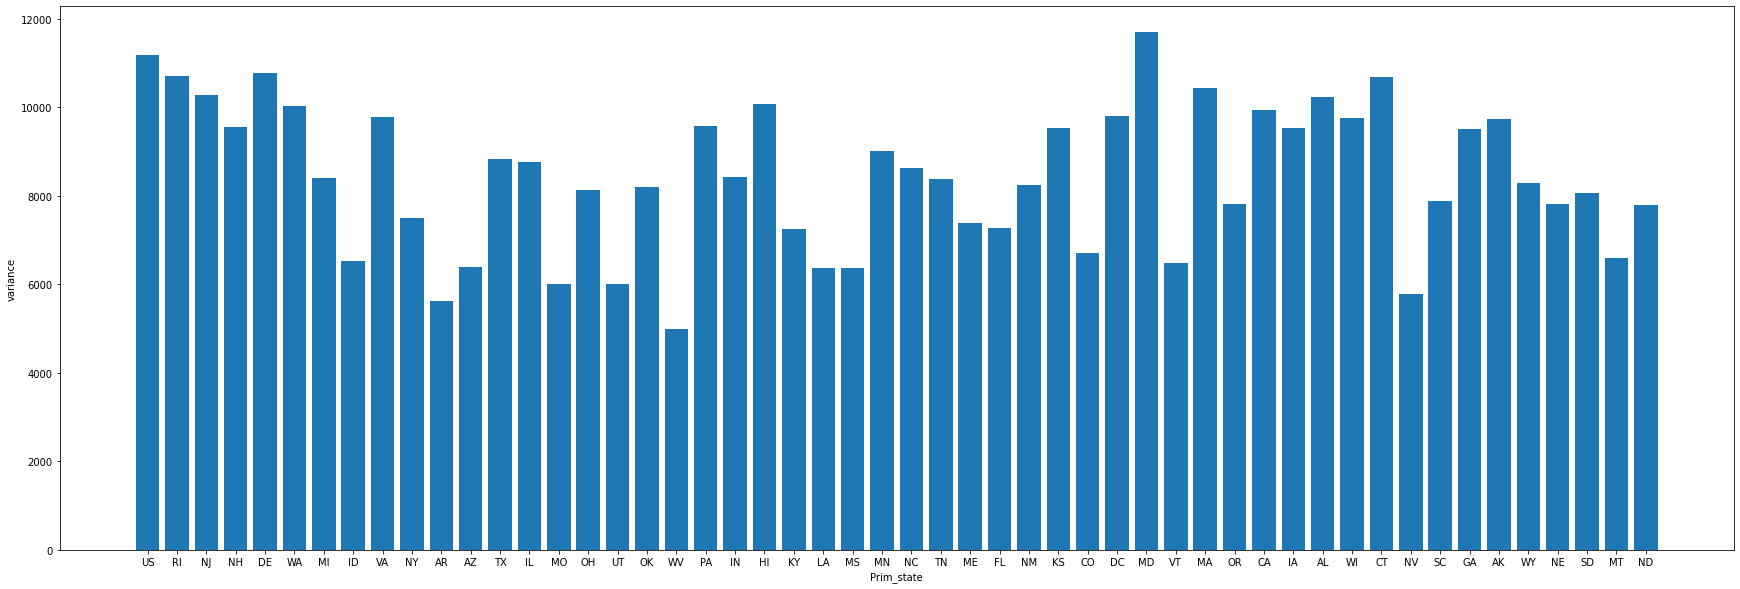

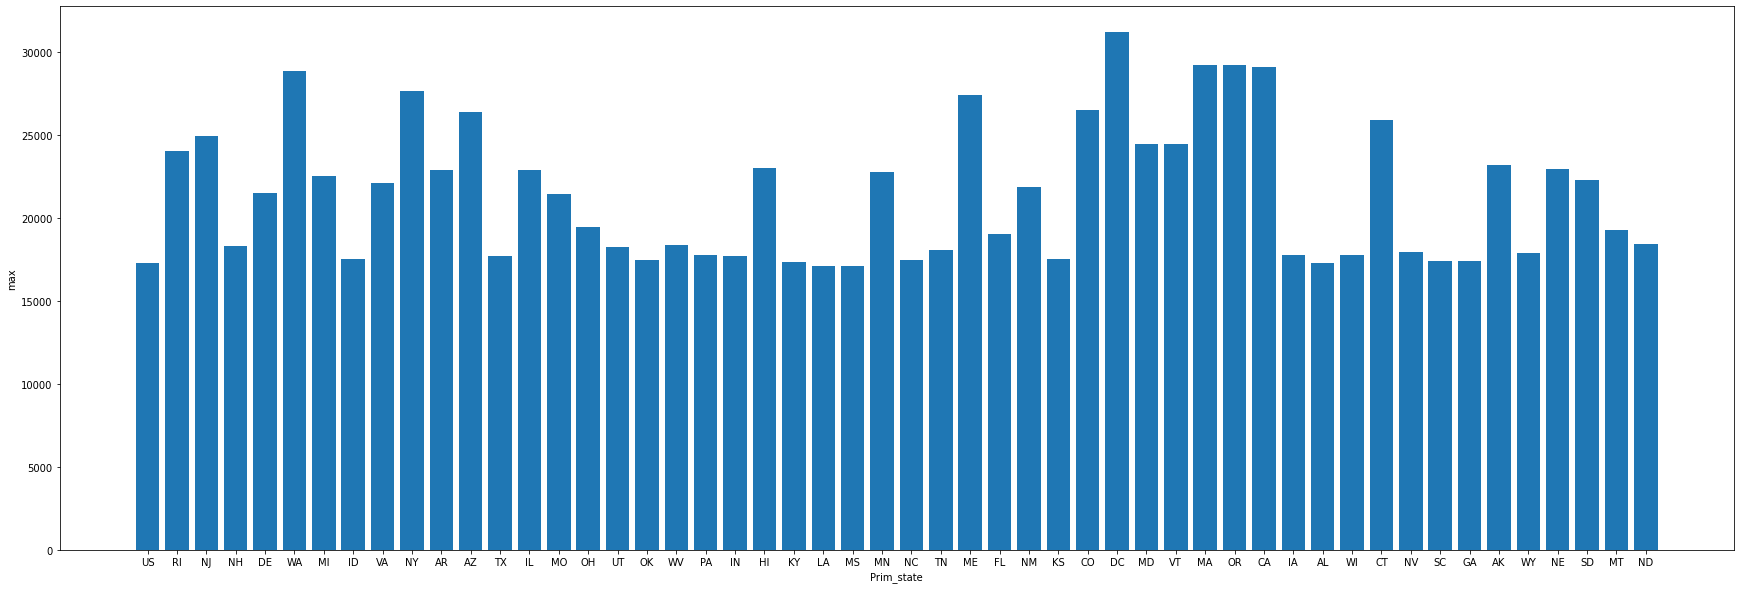

In [ ]:
plt.figure(figsize = (30, 10))
plt.bar(mean_prim_state['PRIM_STATE'], mean_prim_state['mean'])
plt.ylabel('mean')
plt.xlabel('Prim_state')
plt.show()
plt.figure(figsize = (30, 10))
plt.bar(sd_prim_state['PRIM_STATE'], sd_prim_state['sd'])
plt.ylabel('variance')
plt.xlabel('Prim_state')
plt.show()
plt.figure(figsize = (30, 10))
plt.bar(max_prim_state['PRIM_STATE'], max_prim_state['max'])
plt.ylabel('max')
plt.xlabel('Prim_state')
plt.show()

In [ ]:
#function based on which we are ordering function(category) =  w1*mean + w2*variance + w3*maximum
w1 = 1
w2 = -0.5
w3 = 0.2
# formula = w1*mean + w2*variance + w3*maximum
labels_prim = []
for i in range(len(train_df_copy['PRIM_STATE'].unique())):
  temp = (mean_prim_state['mean'][i]*w1) + (sd_prim_state['sd'][i]*w2) + (max_prim_state['max'][i]*w3)
  labels_prim.append(temp)
labels_df1 = pd.DataFrame({'PRIM_STATE': train_df_copy['PRIM_STATE'].unique(), 'LABELS': labels_prim})
labels_df1 = labels_df1.sort_values(by = 'LABELS', ascending = False)
labels_df1['LABELS'] = [i+1 for i in range(len(train_df_copy['PRIM_STATE'].unique()))]

In [ ]:
labels1 = {'PRIM_STATE' : {k: v for k,v in zip(labels_df1['PRIM_STATE'],labels_df1['LABELS'])}}
train_df_copy.replace(labels1, inplace=True)

In [ ]:
#variable = 'NAICS_TITLE'
#1.MEAN FOR EACH UNIQUE CATEGGORY IN THE COLUMN
mean_var2 = []
for i in train_df_copy['NAICS_TITLE'].unique():
  mean_pr = train_df_copy[train_df_copy['NAICS_TITLE']==i]['A_PCT10']
  temp = 0
  for j in mean_pr:
    temp = temp+j
  temp = temp/len(mean_pr)
  mean_var2.append(temp)
mean_NAICS_TITLE = pd.DataFrame({'NAICS_TITLE': train_df_copy['NAICS_TITLE'].unique(), 'mean':mean_var2})

In [ ]:
#variable = 'NAICS_TITLE'
#2.Variance FOR EACH UNIQUE CATEGGORY IN THE COLUMN
sd_var2 = []
for i in train_df_copy['NAICS_TITLE'].unique():
  sd_naics = train_df_copy[train_df_copy['PRIM_STATE']==i]['A_PCT10']
  temp = 0
  mean = mean_NAICS_TITLE[mean_NAICS_TITLE['NAICS_TITLE']==i]['mean'].values
  for j in sd_naics:
    temp = temp+(abs(mean[0]-j)**2)
  temp = temp/len(mean_pr)
  temp = temp**(1/2)
  sd_var2.append(temp)
sd_NAICS_TITLE = pd.DataFrame({'NAICS_TITLE': train_df_copy['NAICS_TITLE'].unique(), 'sd':sd_var2})

In [ ]:
#variable = 'NAICS_TITLE'
#3.MAX A_PCT10 FOR EACH UNIQUE CATEGGORY IN THE COLUMN
max_var2 = []
for i in train_df_copy['NAICS_TITLE'].unique():
  max_ni = train_df_copy[train_df_copy['NAICS_TITLE']==i]['A_PCT10']
  max_var2.append(max(max_ni))
max_NAICS_TITLE = pd.DataFrame({'NAICS_TITLE': train_df_copy['NAICS_TITLE'].unique(), 'max':max_var2})

In [ ]:
labels_naics = []
for i in range(len(train_df_copy['NAICS_TITLE'].unique())):
  temp = (mean_NAICS_TITLE['mean'][i]*w1) + (sd_NAICS_TITLE['sd'][i]*w2) + (max_NAICS_TITLE['max'][i]*w3)
  labels_naics.append(temp)
labels_df2 = pd.DataFrame({'NAICS_TITLE': train_df_copy['NAICS_TITLE'].unique(), 'LABELS': labels_naics})
labels_df2 = labels_df2.sort_values(by = 'LABELS', ascending = False)
labels_df2['LABELS'] = [i+1 for i in range(len(train_df_copy['NAICS_TITLE'].unique()))]

In [ ]:
labels2 = {'NAICS_TITLE' : {k: v for k,v in zip(labels_df2['NAICS_TITLE'],labels_df2['LABELS'])}}
train_df_copy.replace(labels2, inplace=True)

In [ ]:
#variable = 'OCC_TITLE'
#1.MEAN FOR EACH UNIQUE CATEGGORY IN THE COLUMN
mean_var3 = []
for i in train_df_copy['OCC_TITLE'].unique():
  mean_oc = train_df_copy[train_df_copy['OCC_TITLE']==i]['A_PCT10']
  temp = 0
  for j in mean_oc:
    temp = temp+j
  temp = temp/len(mean_oc)
  mean_var3.append(temp)
mean_OCC_TITLE = pd.DataFrame({'OCC_TITLE': train_df_copy['OCC_TITLE'].unique(), 'mean':mean_var3})

In [ ]:
#variable = 'OCC_TITLE'
#2.Variance FOR EACH UNIQUE CATEGGORY IN THE COLUMN
sd_var3 = []
for i in train_df_copy['OCC_TITLE'].unique():
  sd_occ = train_df_copy[train_df_copy['PRIM_STATE']==i]['A_PCT10']
  temp = 0
  mean = mean_OCC_TITLE[mean_OCC_TITLE['OCC_TITLE']==i]['mean'].values
  for j in sd_occ:
    temp = temp+(abs(mean[0]-j)**2)
  temp = temp/len(mean_pr)
  temp = temp**(1/2)
  sd_var3.append(temp)
sd_OCC_TITLE = pd.DataFrame({'OCC_TITLE': train_df_copy['OCC_TITLE'].unique(), 'sd':sd_var3})

In [ ]:
#variable = 'OCC_TITLE'
#3.MAX A_PCT10 FOR EACH UNIQUE CATEGGORY IN THE COLUMN
max_var3 = []
for i in train_df_copy['OCC_TITLE'].unique():
  max_oc = train_df_copy[train_df_copy['OCC_TITLE']==i]['A_PCT10']
  max_var3.append(max(max_oc))
max_OCC_TITLE = pd.DataFrame({'OCC_TITLE': train_df_copy['OCC_TITLE'].unique(), 'max':max_var3})

In [ ]:
labels_occ = []
for i in range(len(train_df_copy['OCC_TITLE'].unique())):
  temp = (mean_OCC_TITLE['mean'][i]*w1) + (sd_OCC_TITLE['sd'][i]*w2) + (max_OCC_TITLE['max'][i]*w3)
  labels_occ.append(temp)
labels_df3 = pd.DataFrame({'OCC_TITLE': train_df_copy['OCC_TITLE'].unique(), 'LABELS': labels_occ})
labels_df3 = labels_df3.sort_values(by = 'LABELS', ascending = False)
labels_df3['LABELS'] = [i+1 for i in range(len(train_df_copy['OCC_TITLE'].unique()))]

In [ ]:
labels3 = {'OCC_TITLE' : {k: v for k,v in zip(labels_df3['OCC_TITLE'],labels_df3['LABELS'])}}
train_df_copy.replace(labels3, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
#splitting the dataset for training
X_train, X_test, y_train, y_test = train_test_split(train_df_copy.values[:, 0:3], train_df_copy.values[:, 3:], test_size = 0.20, random_state = 0)
#let's test for multiple linear regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
errors_lin = mnwe(y_test, y_pred)
errors_lin = np.array(errors_lin)
sum = 0
for i in errors_lin:
  sum = sum+i
print(sum)

71.53505319934735


In [ ]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =5)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))
errors_poly = mnwe(y_test, y_pred)
errors_poly = np.array(errors_poly)
sum = 0
for i in errors_poly:
  sum = sum+i
print(sum)

62.98814944734808


In [ ]:
#let's try decision tree model
from sklearn.tree import DecisionTreeRegressor
reg1 = DecisionTreeRegressor()
reg1.fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
erros_tree = mnwe(y_test, y_pred1)
erros_tree= np.array(erros_tree)
sum1 = 0
for i in erros_tree:
  sum1 = sum1+i
print(sum1)

58.87984232649503


In [ ]:
#let's try randomforest model
from sklearn.ensemble import RandomForestRegressor

reg2 = RandomForestRegressor(n_estimators = 15)
reg2.fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
errors_forest = mnwe(y_test, y_pred2)
errors_forest= np.array(errors_forest)
sum2 = 0
for i in errors_forest:
  sum2 = sum2+i
print(sum2)

52.75232570022347


In [ ]:
test_df_copy = test_df.copy()
#labelling the categorical values for test dataset as formulated for train dataset
test_df_copy.replace(labels1, inplace=True)
test_df_copy.replace(labels2, inplace=True)
test_df_copy.replace(labels3, inplace=True)
test_df_copy

,Unnamed: 0,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,0,25,15,76,24272,29696,37526,47470,61777
1,1,12,14,61,29490,36826,54442,73478,100352
2,2,25,10,55,34808,42310,54390,65326,89994
3,3,25,8,97,28215,32471,38751,50072,59412
4,4,25,18,50,30469,36261,46635,62766,73661
...,...,...,...,...,...,...,...,...,...
921,921,25,1,80,34121,48647,70587,90517,111540
922,922,25,21,36,28964,34024,43282,56255,75738
923,923,33,14,61,26846,34530,50169,71773,94995
924,924,40,14,19,43340,58898,79745,106284,134288


In [ ]:
sub_pred = reg2.predict(test_df_copy.values[:, 0:3])
#replacing the percentiles with the percentiles predicted
test_df['A_PCT10'] = sub_pred[:, 0:1]
test_df['A_PCT25'] = sub_pred[:, 1:2]
test_df['A_MEDIAN'] = sub_pred[:, 2:3]
test_df['A_PCT75'] = sub_pred[:, 3:4]
test_df['A_PCT90'] = sub_pred[:, 4:5]

In [ ]:
#convert float values for the submission set obtained to int values
test_df[['A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90']] = test_df[['A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90']].astype(int)

In [ ]:
# check weather the percentiles replaced are in increasing fashion
flag = 0
PCT10 = test_df['A_PCT10'].values
PCT25 = test_df['A_PCT25'].values
PCT50 = test_df['A_MEDIAN'].values
PCT75 = test_df['A_PCT75'].values
PCT90 = test_df['A_PCT90'].values
for i in range(len(PCT50)):
  if(PCT10[i] > PCT25[i] or PCT25[i] > PCT50[i] or PCT50[i] > PCT75[i] or PCT75[i] > PCT90[i]):
    flag = flag +1
print(flag)

0


In [ ]:
test_df.to_csv('submission.csv')
files.download('submission.csv')